In [1]:
import numpy as np
import imageio
import scipy.special
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

filepath = 'SampleData'
filename = 'Block1.tif'

In [2]:
import tifffile as tiff
def average_image(filepath, filename):
    '''
    Get the average image for a video file (tiff stack).
    '''
    # TODO: the user can define the number of sub-blocks, and get average image for each bloack.
    imstack = tiff.TiffFile(filepath + '/' + filename)
    xdim, ydim = np.shape(imstack.pages[0])
    mvlength = len(imstack.pages)
    mean_im = np.zeros((xdim, ydim))
    
    for frame_num in range(mvlength):
        im = tiff.imread(filepath + '/' + filename, key=frame_num)
        mean_im = mean_im + im

    mean_im = mean_im / mvlength
    
    return mean_im

In [3]:
x2 = average_image(filepath, filename)
x2

array([[ 677.295,  688.97 ,  699.125, ...,  413.005,  412.495,  416.98 ],
       [ 686.195,  704.59 ,  727.305, ...,  391.375,  419.825,  426.42 ],
       [ 700.645,  722.73 ,  716.485, ...,  406.17 ,  421.555,  421.26 ],
       ...,
       [1274.97 , 1285.755, 1348.43 , ...,  530.495,  535.045,  534.625],
       [1292.12 , 1382.345, 1428.71 , ...,  538.63 ,  543.785,  538.535],
       [1375.51 , 1440.95 , 1462.345, ...,  526.055,  541.445,  520.215]])

In [4]:
from functions import visualization as v
v.bokeh_visualization(x2)

Loading BokehJS ...

Loading BokehJS ...

In [4]:
def average_image_oldversion(filepath, filename):
    '''
    Get the average image for a video file (tiff stack).
    '''
    # TODO: the user can define the number of sub-blocks, and get average image for each bloack.
    im = imageio.imread(filepath + '/' + filename)
    xdim, ydim = np.shape(im)    # get dimensions
    mean_im = np.zeros((im.shape))
    
    vid_reader = imageio.get_reader(filepath + '/' + filename)
    mvlength = vid_reader.get_length()
    for frame in vid_reader:
        mean_im = mean_im + frame    
    mean_im = mean_im / mvlength
    
    return mean_im

In [20]:
mean_im = average_image(filepath, filename)

In [5]:
xx = average_image(filepath, filename)
xx

array([[ 677.295,  688.97 ,  699.125, ...,  413.005,  412.495,  416.98 ],
       [ 686.195,  704.59 ,  727.305, ...,  391.375,  419.825,  426.42 ],
       [ 700.645,  722.73 ,  716.485, ...,  406.17 ,  421.555,  421.26 ],
       ...,
       [1274.97 , 1285.755, 1348.43 , ...,  530.495,  535.045,  534.625],
       [1292.12 , 1382.345, 1428.71 , ...,  538.63 ,  543.785,  538.535],
       [1375.51 , 1440.95 , 1462.345, ...,  526.055,  541.445,  520.215]])

In [6]:
def calc_moments(filepath, filename, highest_order):
    '''
    Get all moment-reconstructed images to the user-defined highest order for a video (tiff stack).
    '''
    # TODO: the user can define the number of sub-blocks, and get moment images for each bloack.
    mean_im = average_image(filepath, filename)
    xdim, ydim = np.shape(mean_im)
    m_set = {}
    calculated_moment_images = []
    vid_reader = imageio.get_reader(filepath + '/' + filename)
    mvlength = vid_reader.get_length()
    
    for order in range(highest_order):
        m_set[order+1] = np.zeros((xdim, ydim))
        for frame in vid_reader:
            m_set[order+1] = m_set[order+1] + np.power(frame - mean_im, order+1)
        
        m_set[order+1] = np.int64(m_set[order+1] / mvlength)
    return m_set

In [7]:
def calc_moments2(filepath, filename, highest_order):
    '''
    Get all moment-reconstructed images to the user-defined highest order for a video (tiff stack).
    '''
    # TODO: the user can define the number of sub-blocks, and get moment images for each bloack.
    mean_im = average_image(filepath, filename)
    xdim, ydim = np.shape(mean_im)
    m_set = {}

    imstack = tiff.TiffFile(filepath + '/' + filename)
    xdim, ydim = np.shape(imstack.pages[0])
    mvlength = len(imstack.pages)
    
    for order in range(highest_order):
        m_set[order+1] = np.zeros((xdim, ydim))
        for frame_num in range(mvlength):
            im = tiff.imread(filepath + '/' + filename, key=frame_num)
            m_set[order+1] = m_set[order+1] + np.power(im - mean_im, order+1)
        
        m_set[order+1] = np.int64(m_set[order+1] / mvlength)
    return m_set

In [17]:
m_set=calc_moments2(filepath, filename, 7)

In [9]:
tt=calc_moments2(filepath, filename, 5)
tt[5]

array([[ 212960207231,  147582578663,  346563701764, ...,  156101243528,
          86335375917,   33983013896],
       [ 340810600568,  387490545613,   24414261977, ...,   29533812848,
          41399520274,   48946959598],
       [  86033998080,  200919479424,  230189323807, ...,   24303503184,
         122529112626,   46726611728],
       ...,
       [ 564372215158,  659384458494,  414199008387, ...,   75417345365,
          51657709702,   34396257987],
       [1868469117311, -215425651671, 1347874895158, ...,   60209623752,
          76598251301,  184273452037],
       [2882175988325, 1110178336892, 1198428763239, ...,   77036820280,
          97682254610,   64167000165]])

In [10]:
def calc_cumulants_from_moments(moment_set, highest_order):
    '''
    Calculate cumulant-reconstructed images from moment-reconstructed images.
    '''
    k_set = {}
    for order in range(1, highest_order + 1):
        k_set[order] = np.int64(moment_set[order] - np.sum(np.array([scipy.special.comb(order-1,i)*k_set[order-i]*moment_set[i] for i in range(1,order)]),axis=0))
    
    return k_set

In [11]:
calc_cumulants_from_moments(tt, 5)

{1: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 2: array([[21213, 16718, 19022, ..., 13316, 10310,  9398],
        [19050, 19709, 18398, ...,  7570, 10577, 10664],
        [17708, 22708, 20651, ...,  9781, 11541, 11051],
        ...,
        [34483, 41634, 41795, ..., 13214, 12056, 12146],
        [47728, 48433, 45340, ..., 15030, 13819, 15979],
        [48235, 56810, 51111, ..., 13744, 14302, 10319]]),
 3: array([[ 953057,  936245, 1128340, ..., 1274646,  808787,  441399],
        [1301344, 1884027,  101102, ...,  457510,  447120,  524821],
        [ 644556, 1224052,  770136, ...,  284251, 1054820,  519248],
        ...,
        [1767622, 1448126, 1468811, ...,  506213,  405047,  419591],
        [4357143, -423133, 3508082, ...,  463567,  661778, 1346977],
        [6420504, 2074726, 2988785, ...,  754172,  838597,  563

In [12]:
kk=calc_cumulants_from_moments(tt, 5)
kk[5]

array([[  10788225821,   -8938860437,  131930866964, ...,  -13630617832,
           2949436217,   -7499664124],
       [  92904568568,   16167664183,    5813516017, ...,   -5099694152,
          -5892362126,   -7019951842],
       [ -28103978400,  -77038248736,   71148538447, ...,   -3499087126,
            792336426,  -10655484752],
       ...,
       [ -45156879102,   56471679654, -199690549063, ...,    8526359545,
           2825243382,  -16567264873],
       [-211108093729,  -10489645781, -242689483642, ...,   -9464496348,
         -14852850519,  -30960002793],
       [-214754116075,  -68473503708, -329169138111, ...,  -26616579400,
         -22253888330,    5994772755]])

In [13]:
im = imageio.imread(filepath + '/' + filename)
xdim, ydim = im.shape    # get dimensions
mean_im = np.zeros((im.shape))

vid_reader = imageio.get_reader(filepath + '/' + filename)
mvlength = vid_reader.get_length()

# 1. Calculate the average image.
for frame in vid_reader:
    mean_im = mean_im + frame
    
mean_im = mean_im / mvlength

# 2. calculate moments for each order
highest_order = 7
m_set = {}
calculated_moment_images = []
for order in range(1, highest_order + 1):
    m_set[order] = np.zeros((im.shape))
    for frame in vid_reader:
        m_set[order] = m_set[order] + np.power(frame - mean_im, order)
        
    m_set[order] = np.int64(m_set[order] / mvlength)
m_set    

TypeError: object of type 'TiffFile' has no len()

In [ ]:
# 3. calculate cumulants from moments
import scipy.special
import numpy as np

highest_order = 7
k_set = {}
for order in range(1, highest_order + 1):
    k_set[order] = np.int64(m_set[order] - np.sum(np.array([scipy.special.comb(order-1,i)*k_set[order-i]*m_set[i] for i in range(1,order)]),axis=0))
    
k_set

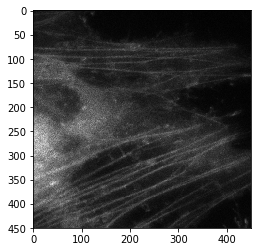

In [15]:
%matplotlib inline
x=np.array(tt[2])
plt.imshow(x, cmap = 'gray',interpolation='nearest')

In [16]:
# 5. ldrc

# in the function
from scipy.interpolate import griddata
def ldrc(input_im, mask_im, order, window_size):
    xdim_mask, ydim_mask = np.shape(mask_im)
    xdim, ydim = np.shape(input_im)
    if xdim == xdim_mask and ydim == ydim_mask:
        mask = mask_im
    else:
        # resize mask to the image dimension if not the same dimension (xdim = xdim_mask, ydim = ydim_mask)
        mod_xdim = (xdim_mask-1)*order + 1    # new mask x dimemsion
        mod_ydim = (ydim_mask-1)*order + 1    # new mask y dimemsion
        px = np.arange(0,mod_xdim,order)
        py = np.arange(0,mod_ydim,order)
    
        # create coordinate list for interpolation
        coor_lst = [] 
        for i in px:
            for j in py:
                coor_lst.append([i,j])
        coor_lst = np.array(coor_lst)

        orderjx = complex(str(mod_xdim) + 'j')
        orderjy = complex(str(mod_ydim) + 'j')
        px_new, py_new = np.mgrid[0:mod_xdim-1:orderjx, 0:mod_ydim-1:orderjy]    # new coordinates for interpolated mask

        interp_mask = griddata(coor_lst, mask_im.reshape(-1,1), (px_new, py_new), method='cubic')    # interpolation
        mask = interp_mask.reshape(px_new.shape)
    
    # input_im, mask, window_size, xdim, ydim
    seq_map = np.zeros((xdim, ydim))
    ldrc_im = np.zeros((xdim, ydim))
    for i in range(xdim - window_size + 1):
        for j in range(ydim - window_size + 1):
            window = input_im[i:i+window_size, j:j+window_size]
            norm_window = (window - np.min(window)) / (np.max(window) - np.min(window))
            # norm_window = window / np.max(window)
            ldrc_im[i:i+window_size, j:j+window_size] = ldrc_im[i:i+window_size, j:j+window_size] + norm_window * np.max(mask[i:i+window_size, j:j+window_size])
            seq_map[i:i+window_size, j:j+window_size] = seq_map[i:i+window_size, j:j+window_size] + 1
        
    ldrc_im = ldrc_im / seq_map  
    return ldrc_im

In [21]:
# variable for the function
input_im = m_set[6]
mask_im = mean_im
order = 3    # moments/cumulants order of the image need ldrc processing
window_size = 25

proldrc_im = ldrc(input_im, mask_im, order, window_size)
proldrc_im

array([[ 37.56813909,   8.81631708,  50.608915  , ..., 142.05370972,
         74.27186172,  21.90552345],
       [ 70.6925468 ,  42.43343042,   0.43921053, ...,  16.3228598 ,
         38.40339738,  45.71075751],
       [  7.52059522,  26.75276504,  30.76963799, ...,  29.39606267,
        106.41861927,  39.20923958],
       ...,
       [ 13.22936166,  29.21226012,  27.18606781, ...,   6.11688993,
          3.48698899,   1.57214727],
       [ 62.42901748,  51.06650812,  39.04886344, ...,   5.78186697,
          4.60435191,  11.90695375],
       [ 81.57990536,  91.10296254,  55.29448655, ...,   4.10317213,
          6.16556139,   2.95860687]])

In [ ]:
# 4. deconvolution shrinking kernel
def fft_pad(psf, out_shape, mode='constant'):
    psf_shape = np.shape(psf)
    shape_diff = (out_shape[0]-psf_shape[0], out_shape[1]-psf_shape[1])
    #out_psf = np.pad(psf, ((0,shape_diff[0]), (0,shape_diff[1])), mode)
    out_psf = np.pad(psf, ((shape_diff[0]//2+1,shape_diff[0]//2), (shape_diff[1]//2+1,shape_diff[1]//2)), mode)
    return out_psf
        
# steal from https://github.com/david-hoffman/pyDecon/tree/master/notebooks

from numpy.fft import (fftshift, ifftshift, fftn, ifftn, rfftn, irfftn)



def _prep_img_and_psf(image, psf):
    """Do basic data checking, convert data to float, normalize psf and make
    sure data are positive"""
    assert psf.ndim == image.ndim, ("image and psf do not have the same number"
                                    " of dimensions")
    image = image.astype(np.float)
    psf = psf.astype(np.float)
    # need to make sure both image and PSF are totally positive.
    image = _ensure_positive(image)
    psf = _ensure_positive(psf)
    # normalize the kernel
    psf /= psf.sum()
    return image, psf

def _ensure_positive(data):
    """Make sure data is positive and has no zeros

    For numerical stability

    If we realize that mutating data is not a problem
    and that changing in place could lead to signifcant
    speed ups we can lose the data.copy() line"""
    # make a copy of the data
    data = data.copy()
    data[data < 0] = np.finfo(data.dtype).eps
    return data

def _zero2eps(data):
    """Make sure data is positive and has no zeros

    For numerical stability

    If we realize that mutating data is not a problem
    and that changing in place could lead to signifcant
    speed ups we can lose the data.copy() line"""
    # make a copy of the data
    return np.fmax(data, np.finfo(data.dtype).eps)

def _rl_core_matlab(image, otf, psf, u_t, **kwargs):
    """The core update step of the RL algorithm

    This is a fast but inaccurate version modeled on matlab's version
    One improvement is to pad everything out when the shape isn't
    good for fft."""
    reblur = irfftn(otf * rfftn(u_t, u_t.shape, **kwargs), u_t.shape, **kwargs)
    reblur = _ensure_positive(reblur)
    im_ratio = image / reblur
    estimate = irfftn(np.conj(otf) * rfftn(im_ratio, im_ratio.shape, **kwargs), im_ratio.shape, **kwargs)
    # need to figure out a way to pass the psf shape
    for i, (s, p) in enumerate(zip(image.shape, psf.shape)):
        if s % 2 and not p % 2:
            estimate = np.roll(estimate, 1, i)
    estimate = _ensure_positive(estimate)
    return u_t * estimate

def _rl_accelerate(g_tm1, g_tm2, u_t, u_tm1, u_tm2, prediction_order):
    """Biggs-Andrews Acceleration

    .. [2] Biggs, D. S. C.; Andrews, M. Acceleration of Iterative Image
    Restoration Algorithms. Applied Optics 1997, 36 (8), 1766."""
    # TODO: everything here can be wrapped in ne.evaluate
    if g_tm2 is not None:
        alpha = (g_tm1 * g_tm2).sum() / ((g_tm2**2).sum() + np.finfo(g_tm1.dtype).eps)
        alpha = max(min(alpha, 1), 0)
    else:
        alpha = 0
    # print("lambda = {:.6f}".format(alpha))
    # if alpha is positive calculate predicted step
    if alpha:
        # first order correction
        h1_t = u_t - u_tm1
        if prediction_order > 1:
            # second order correction
            h2_t = (u_t - 2 * u_tm1 + u_tm2)
        else:
            h2_t = 0
        u_tp1 = u_t + alpha * h1_t + alpha**2 / 2 * h2_t
        return u_tp1
    else:
        return u_t
    
def richardson_lucy(image, psf, iterations=10, prediction_order=1,
                    core_type="matlab", init="matlab", **kwargs):
    image, psf = _prep_img_and_psf(image, psf)
    # choose core
    if core_type == "matlab":
        core = _rl_core_matlab
    else:
        raise ValueError("{} is not an acceptable core type".format(core_type))
    # set up the proper dict for the right core
    if core is _rl_core_matlab:
        image, psf = _prep_img_and_psf(image, psf)
        if psf.shape != image.shape:
            # its been assumed that the background of the psf has already been
            # removed and that the psf has already been centered
            psf = fft_pad(psf, image.shape, mode='constant')
        otf = rfftn(ifftshift(psf))
        core_dict = dict(image=image, otf=otf, psf=psf)
    else:
        raise RuntimeError("{} is not a valid core".format(core))
    # initialize variable for iterations
    # previous estimate
    u_tm1 = u_tm2 = None
    if init == "matlab":
        core_dict["u_t"] = u_t = image
    else:
        # current estimate, for the initial estimate we use the mean of the
        # data this promotes a smooth solution and helps to reduce noise.
        core_dict["u_t"] = u_t = np.ones_like(image) * image.mean()
    # previous difference
    g_tm1 = g_tm2 = None
    for i in range(iterations):
        # if prediction is requested perform it
        if prediction_order:
            # need to save prediction as intermediate value
            y = _rl_accelerate(g_tm1, g_tm2, u_t, u_tm1, u_tm2,
                               prediction_order)
        else:
            y = u_t
        # update estimate and ensure positive
        core_dict["u_t"] = _ensure_positive(y)
        # call the update function
        u_tp1 = core(**core_dict, **kwargs)
        # update
        # update g's
        g_tm2 = g_tm1
        # this is where the magic is, we need to compute from previous step
        # which may have been augmented by acceleration
        g_tm1 = u_tp1 - y
        # now move u's along
        # Here we don't want to update with accelerated version.
        # why not? is this a mistake?
        u_t, u_tm1, u_tm2 = u_tp1, u_t, u_tm1
        
    # return final estimate
    return u_t

In [355]:
from numpy.fft import (fftshift, ifftshift, fftn, ifftn, rfftn, irfftn)

def _prep_img_and_psf(image, psf):
    """Do basic data checking, convert data to float, normalize psf and make
    sure data are positive"""
    #assert psf.ndim == image.ndim, ("image and psf do not have the same number"
     #                               " of dimensions")
    image = image.astype(np.float)
    psf = psf.astype(np.float)
    # need to make sure both image and PSF are totally positive.
    image = _ensure_positive(image)
    psf = _ensure_positive(psf)
    # normalize the kernel
    psf /= psf.sum()
    return image, psf

def _ensure_positive(data):
    """Make sure data is positive and has no zeros

    For numerical stability

    If we realize that mutating data is not a problem
    and that changing in place could lead to signifcant
    speed ups we can lose the data.copy() line"""
    # make a copy of the data
    data = data.copy()
    data[data <= 0] = np.finfo(data.dtype).eps
    return data

def _zero2eps(data):
    """Make sure data is positive and has no zeros

    For numerical stability

    If we realize that mutating data is not a problem
    and that changing in place could lead to signifcant
    speed ups we can lose the data.copy() line"""
    # make a copy of the data
    return np.fmax(data, np.finfo(data.dtype).eps)

# https://github.com/aboucaud/pypher/blob/master/pypher/pypher.py
def zero_pad(image, shape, position='center'):
    """
    Extends image to a certain size with zeros
    Parameters
    ----------
    image: real 2d `numpy.ndarray`
        Input image
    shape: tuple of int
        Desired output shape of the image
    position : str, optional
        The position of the input image in the output one:
            * 'corner'
                top-left corner (default)
            * 'center'
                centered
    Returns
    -------
    padded_img: real `numpy.ndarray`
        The zero-padded image
    """
    shape = np.asarray(shape, dtype=int)
    imshape = np.asarray(image.shape, dtype=int)

    if np.alltrue(imshape == shape):
        return image

    if np.any(shape <= 0):
        raise ValueError("ZERO_PAD: null or negative shape given")

    dshape = shape - imshape
    if np.any(dshape < 0):
        raise ValueError("ZERO_PAD: target size smaller than source one")

    pad_img = np.zeros(shape, dtype=image.dtype)

    idx, idy = np.indices(imshape)

    if position == 'center':
        if np.any(dshape % 2 != 0):
            raise ValueError("ZERO_PAD: source and target shapes "
                             "have different parity.")
        offx, offy = dshape // 2
    else:
        offx, offy = (0, 0)

    pad_img[idx + offx, idy + offy] = image

    return pad_img


def psf2otf(psf, shape):
    """
    Convert point-spread function to optical transfer function.
    Compute the Fast Fourier Transform (FFT) of the point-spread
    function (PSF) array and creates the optical transfer function (OTF)
    array that is not influenced by the PSF off-centering.
    By default, the OTF array is the same size as the PSF array.
    To ensure that the OTF is not altered due to PSF off-centering, PSF2OTF
    post-pads the PSF array (down or to the right) with zeros to match
    dimensions specified in OUTSIZE, then circularly shifts the values of
    the PSF array up (or to the left) until the central pixel reaches (1,1)
    position.
    Parameters
    ----------
    psf : `numpy.ndarray`
        PSF array
    shape : int
        Output shape of the OTF array
    Returns
    -------
    otf : `numpy.ndarray`
        OTF array
    Notes
    -----
    Adapted from MATLAB psf2otf function
    """
    if np.all(psf == 0):
        return np.zeros_like(psf)

    inshape = psf.shape
    # Pad the PSF to outsize
    psf = zero_pad(psf, shape, position='corner')

    # Circularly shift OTF so that the 'center' of the PSF is
    # [0,0] element of the array
    for axis, axis_size in enumerate(inshape):
        psf = np.roll(psf, -int(axis_size / 2), axis=axis)

    # Compute the OTF
    otf = np.fft.fft2(psf)

    # Estimate the rough number of operations involved in the FFT
    # and discard the PSF imaginary part if within roundoff error
    # roundoff error  = machine epsilon = sys.float_info.epsilon
    # or np.finfo().eps
    n_ops = np.sum(psf.size * np.log2(psf.shape))
    otf = np.real_if_close(otf, tol=n_ops)

    return otf

def otf2psf(otf, shape):

    if np.all(otf == 0):
        return np.zeros_like(otf)

    inshape = otf.shape
    
    # Compute the PSF
    psf = np.fft.ifft2(otf)
    
    # Estimate the rough number of operations involved in the FFT
    # and discard the PSF imaginary part if within roundoff error
    # roundoff error  = machine epsilon = sys.float_info.epsilon
    # or np.finfo().eps
    n_ops = np.sum(otf.size * np.log2(otf.shape))
    psf = np.real_if_close(psf, tol=n_ops)
    psf=np.real(psf)
    
    
    # Circularly shift PSF so that the 'center' of the PSF is
    # [0,0] element of the array
    for axis, axis_size in enumerate(shape):
        psf = np.roll(psf, int(axis_size / 2), axis=axis)
    
    # Crop output array
    psf = psf[0:shape[0], 0:shape[1]]

    return psf

def corelucy(image, H):
    u_t = image
    reblur = np.real(ifftn(H * fftn(u_t, u_t.shape), u_t.shape))
    reblur = _ensure_positive(reblur)
    im_ratio = image / reblur
    f = fftn(im_ratio)
    return f

# image, psf = _prep_img_and_psf(ext_im, deconv_psf0)

def richardson_lucy2(image, psf, iterations=10, **kwargs):
    
    # 1. prepare parameters
    image, psf = _prep_img_and_psf(image, psf)
    sizeI, sizePSF = image.shape, psf.shape
    J, P = {}, {}
    J[1], J[2], J[3], J[4] = image, image, 0, np.zeros((np.prod(sizeI), 2))
    P[1], P[2], P[3], P[4] = psf, psf, 0, np.zeros((np.prod(sizePSF), 2))
    WEIGHT = np.ones(image.shape)
    fw = fftn(WEIGHT)
    
    # 2. L_R iterations
    for k in range(iterations):
        # 2a. make image and PSF predictions for the next iteration
        Y = np.maximum(J[2],0)
        B = np.maximum(P[2],0)
        B /= B.sum()
        # 2b. make core for the LR estimation
        H = psf2otf(B, sizeI) 
        CC = corelucy(Y, H)
        # 2c. Determine next iteration image & apply positivity constraint
        J[3] = J[2]
        scale = np.real(ifftn(np.multiply(np.conj(H),fw))) + np.sqrt(np.finfo(H.dtype).eps)
        J[2] = np.maximum(np.multiply(image, np.real(ifftn(np.multiply(np.conj(H), CC))))/scale, 0)
        J[4] = np.vstack([J[2].T.reshape(-1,) - Y.T.reshape(-1,), J[4][:,1]]).T
        # 2d. Determine next iteration PSF & apply positivity constraint + normalization
        P[3] = P[2]
        H = fftn(J[3])
        scale = otf2psf(np.multiply(np.conj(H),fw), sizePSF) + np.sqrt(np.finfo(H.dtype).eps)
        P[2] = np.maximum(np.multiply(B, otf2psf(np.multiply(np.conj(H),CC), sizePSF))/scale, 0)
        P[2] /= P[2].sum()
        P[4] = np.vstack([P[2].T.reshape(-1,) - B.T.reshape(-1,), P[4][:,1]]).T
    P, J = P[2], J[2]  # PSF and updated image
    return P, J   

In [356]:
# masks.py
def gauss2D_mask(shape = (3,3), sigma = 0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    mdim, ndim = [(pixel-1) / 2 for pixel in shape]
    y, x = np.ogrid[-mdim:(mdim + 1), -ndim:(ndim + 1)]
    h = np.exp( -(x*x + y*y) / (2*sigma*sigma) )
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h
  

### R-L deconvolution
The result from MATLAB and Python are not exactly the same. In MATLAB, at small areas (3*3), the deconvoluted images have pixel values that are zero while no zeros in python.

In [360]:
# 3. DeconvSK
im = m_set[6]
xdim, ydim = im.shape    
ext_im = np.append(np.append(im, np.fliplr(im), axis=1), 
                   np.append(np.flipud(im), np.rot90(im, 2), axis=1), axis=0)

# TODO: add notes on how to determine the following values.
deconv_psf0 = gauss2D_mask((51, 51), 2)
deconv_psf0 = deconv_psf0 / np.max(deconv_psf0)
deconv_lambda = 1.5
deconv_iter = 17

deconv_im = ext_im
for iter_num in range(deconv_iter):
    #print('iter', iter_num)
    alpha = deconv_lambda**(iter_num+1) / (deconv_lambda - 1)
    deconv_psf, deconv_im = richardson_lucy2(deconv_im, deconv_psf0**alpha, 1)    
    
deconv_im = deconv_im[0:xdim, 0:ydim]

iter 0
P [[2.56402993e-17 2.56961382e-17 2.57286108e-17 ... 2.57286108e-17
  2.56961382e-17 2.56402993e-17]
 [2.56723202e-17 2.56488024e-17 2.57145291e-17 ... 2.57145291e-17
  2.56488024e-17 2.56723202e-17]
 [2.56979675e-17 2.56664764e-17 2.56480370e-17 ... 2.56480370e-17
  2.56664764e-17 2.56979675e-17]
 ...
 [2.56979675e-17 2.56664764e-17 2.56480370e-17 ... 2.56480370e-17
  2.56664764e-17 2.56979675e-17]
 [2.56723202e-17 2.56488024e-17 2.57145291e-17 ... 2.57145291e-17
  2.56488024e-17 2.56723202e-17]
 [2.56402993e-17 2.56961382e-17 2.57286108e-17 ... 2.57286108e-17
  2.56961382e-17 2.56402993e-17]]
J [[1.43679865e+14 9.01441307e+13 2.77819504e+14 ... 2.77819504e+14
  9.01441307e+13 1.43679865e+14]
 [2.22314371e+14 2.07922438e+14 5.99550082e+13 ... 5.99550082e+13
  2.07922438e+14 2.22314371e+14]
 [7.71749281e+13 1.56679713e+14 1.81069432e+14 ... 1.81069432e+14
  1.56679713e+14 7.71749281e+13]
 ...
 [7.71749281e+13 1.56679713e+14 1.81069432e+14 ... 1.81069432e+14
  1.56679713e+14 7.71

P [[2.14818985e-16 2.14853909e-16 2.14918066e-16 ... 2.14918066e-16
  2.14853909e-16 2.14818985e-16]
 [2.14878267e-16 2.14822031e-16 2.14909037e-16 ... 2.14909037e-16
  2.14822031e-16 2.14878267e-16]
 [2.14861171e-16 2.14878634e-16 2.14845536e-16 ... 2.14845536e-16
  2.14878634e-16 2.14861171e-16]
 ...
 [2.14861171e-16 2.14878634e-16 2.14845536e-16 ... 2.14845536e-16
  2.14878634e-16 2.14861171e-16]
 [2.14878267e-16 2.14822031e-16 2.14909037e-16 ... 2.14909037e-16
  2.14822031e-16 2.14878267e-16]
 [2.14818985e-16 2.14853909e-16 2.14918066e-16 ... 2.14918066e-16
  2.14853909e-16 2.14818985e-16]]
J [[1.09824268e+14 2.97541064e+13 4.13825896e+14 ... 4.13825896e+14
  2.97541064e+13 1.09824268e+14]
 [2.83829875e+14 2.10556202e+14 9.79188061e+12 ... 9.79188061e+12
  2.10556202e+14 2.83829875e+14]
 [1.58083429e+13 1.31791589e+14 1.57404182e+14 ... 1.57404182e+14
  1.31791589e+14 1.58083429e+13]
 ...
 [1.58083429e+13 1.31791589e+14 1.57404182e+14 ... 1.57404182e+14
  1.31791589e+14 1.58083429e

P [[2.21993304e-16 2.21996628e-16 2.21982113e-16 ... 2.21982118e-16
  2.21996585e-16 2.21993302e-16]
 [2.21997054e-16 2.22002085e-16 2.22006874e-16 ... 2.22006874e-16
  2.22002089e-16 2.21997035e-16]
 [2.21990978e-16 2.21988854e-16 2.22005729e-16 ... 2.22005717e-16
  2.21988849e-16 2.21990964e-16]
 ...
 [2.21990970e-16 2.21988842e-16 2.22005724e-16 ... 2.22005719e-16
  2.21988842e-16 2.21990961e-16]
 [2.21997043e-16 2.22002067e-16 2.22006878e-16 ... 2.22006883e-16
  2.22002077e-16 2.21997032e-16]
 [2.21993294e-16 2.21996626e-16 2.21982133e-16 ... 2.21982149e-16
  2.21996584e-16 2.21993294e-16]]
J [[1.09817903e+14 2.97106191e+13 4.13892550e+14 ... 4.13892550e+14
  2.97106191e+13 1.09817903e+14]
 [2.83864612e+14 2.10582214e+14 9.73891241e+12 ... 9.73891241e+12
  2.10582214e+14 2.83864612e+14]
 [1.57801488e+13 1.31737979e+14 1.57433616e+14 ... 1.57433616e+14
  1.31737979e+14 1.57801488e+13]
 ...
 [1.57801488e+13 1.31737979e+14 1.57433616e+14 ... 1.57433616e+14
  1.31737979e+14 1.57801488e

In [362]:
im = m_set[6]
xdim, ydim = im.shape    
ext_im = np.append(np.append(im, np.fliplr(im), axis=1), 
                   np.append(np.flipud(im), np.rot90(im, 2), axis=1), axis=0)

# TODO: add notes on how to determine the following values.
deconv_psf0 = gauss2D_mask((51, 51), 2)
deconv_psf0 = deconv_psf0 / np.max(deconv_psf0)
deconv_lambda = 1.5
deconv_iter = 20

deconv_im = ext_im
for iter_num in range(deconv_iter):
    #print('iter', iter_num)
    alpha = deconv_lambda**(iter_num+1) / (deconv_lambda - 1)
    deconv_im = richardson_lucy(deconv_im, deconv_psf0**alpha, 1)    
    
deconv_im = deconv_im[0:xdim, 0:ydim]
deconv_im

array([[1.09817928e+14, 2.97106258e+13, 4.13892643e+14, ...,
        1.20931804e+14, 2.92909317e+13, 1.08265661e+12],
       [2.83864675e+14, 2.10582261e+14, 9.73891459e+12, ...,
        4.81507539e+11, 7.95319395e+12, 1.17316254e+13],
       [1.57801523e+13, 1.31738008e+14, 1.57433651e+14, ...,
        4.14012692e+12, 9.04053977e+13, 1.23258084e+13],
       ...,
       [1.92623948e+13, 2.57972860e+14, 4.34014693e+14, ...,
        2.70789818e+13, 8.35840042e+12, 1.01496763e+12],
       [1.09100008e+15, 9.36775964e+14, 7.62003153e+14, ...,
        2.78460769e+13, 2.33493142e+13, 1.27530967e+14],
       [3.90459127e+15, 4.66181098e+15, 1.75614105e+15, ...,
        1.68250385e+13, 4.19288371e+13, 9.89123036e+12]])

## re-create matlab code based on our occasion (without extra inputs)

### initialization

In [292]:
# input: image = ext_im, psf = deconv_psf0, numit = 1
image, psf = _prep_img_and_psf(ext_im, deconv_psf0)
sizeI, sizePSF = image.shape, psf.shape
J, P = {}, {}
J[1], J[2], J[3], J[4] = image, image, 0, np.zeros((np.prod(sizeI), 2))
P[1], P[2], P[3], P[4] = psf, psf, 0, np.zeros((np.prod(sizePSF), 2))
WEIGHT = np.ones(ext_im.shape)
fw = fftn(WEIGHT)

### Start iteration and Corelucy

In [293]:
u_t = ext_im
image = ext_im
Y = np.maximum(J[2],0)
B = np.maximum(P[2],0)
# input: image, psf, u_t= image
H = psf2otf(B, sizeI)
H

array([[1.        , 0.99990253, 0.99961017, ..., 0.99912309, 0.99961017,
        0.99990253],
       [0.99990253, 0.99980506, 0.99951273, ..., 0.9990257 , 0.99951273,
        0.99980506],
       [0.99961017, 0.99951273, 0.99922048, ..., 0.99873359, 0.99922048,
        0.99951273],
       ...,
       [0.99912309, 0.9990257 , 0.99873359, ..., 0.99824694, 0.99873359,
        0.9990257 ],
       [0.99961017, 0.99951273, 0.99922048, ..., 0.99873359, 0.99922048,
        0.99951273],
       [0.99990253, 0.99980506, 0.99951273, ..., 0.9990257 , 0.99951273,
        0.99980506]])

In [296]:
def corelucy(image, H):
    u_t = image
    reblur = np.real(ifftn(H * fftn(u_t, u_t.shape), u_t.shape))
    reblur = _ensure_positive(reblur)
    im_ratio = image / reblur
    CC = fftn(im_ratio)
    return CC
CC

array([[ 7.71177241e+05+0.00000000e+00j,  3.30754616e+03+1.15455610e+01j,
         4.40524537e+03+3.07549141e+01j, ...,
         2.57874442e+03-2.70055356e+01j,  4.40524537e+03-3.07549141e+01j,
         3.30754616e+03-1.15455610e+01j],
       [ 5.25975072e+03+1.83600682e+01j, -1.54174433e+03-1.07635808e+01j,
        -2.45540306e+03-2.57138607e+01j, ...,
        -4.91854670e+02+3.43384916e+00j, -2.45552274e+03+8.57142616e+00j,
        -1.54178190e+03-2.33185915e-10j],
       [-3.89097059e+03-2.71645405e+01j, -1.84221159e+03-1.92922999e+01j,
         1.31537299e+03+1.83672653e+01j, ...,
         6.86670583e+02-2.39694225e+00j,  1.31550122e+03-1.56205715e-10j,
        -1.84230138e+03-6.43087111e+00j],
       ...,
       [ 2.39631132e+03-2.50950308e+01j, -1.88248365e+03+1.31424287e+01j,
         1.55704156e+03-5.43512244e+00j, ...,
         1.25528490e+02-2.62944702e+00j,  1.55681390e+03-2.71742877e+01j,
        -1.88234603e+03+2.62842168e+01j],
       [-3.89097059e+03+2.71645405e+01j, -1.

In [297]:
J[3] = J[2]
scale = np.real(ifftn(np.multiply(np.conj(H),fw))) + np.sqrt(np.finfo(H.dtype).eps)
J[2] = np.maximum(np.multiply(image, np.real(ifftn(np.multiply(np.conj(H), CC))))/scale, 0)

J[2]

array([[1.43092991e+14, 8.79465841e+13, 2.61993193e+14, ...,
        2.61993193e+14, 8.79465841e+13, 1.43092991e+14],
       [2.14679914e+14, 1.97758821e+14, 5.77824968e+13, ...,
        5.77824968e+13, 1.97758821e+14, 2.14679914e+14],
       [7.22875447e+13, 1.40806704e+14, 1.69184669e+14, ...,
        1.69184669e+14, 1.40806704e+14, 7.22875447e+13],
       ...,
       [7.22875447e+13, 1.40806704e+14, 1.69184669e+14, ...,
        1.69184669e+14, 1.40806704e+14, 7.22875447e+13],
       [2.14679914e+14, 1.97758821e+14, 5.77824968e+13, ...,
        5.77824968e+13, 1.97758821e+14, 2.14679914e+14],
       [1.43092991e+14, 8.79465841e+13, 2.61993193e+14, ...,
        2.61993193e+14, 8.79465841e+13, 1.43092991e+14]])

In [298]:
J[4] = np.vstack([J[2].T.reshape(-1,) - Y.T.reshape(-1,), J[4][:,1]]).T
J[4][43]

array([-2.4515885e+13,  0.0000000e+00])

In [301]:
P[3] = P[2]
H = fftn(J[3])
scale = otf2psf(np.multiply(np.conj(H),fw), sizePSF) + np.sqrt(np.finfo(H.dtype).eps)
P[2] = np.maximum(np.multiply(B, otf2psf(np.multiply(np.conj(H),CC), sizePSF))/scale, 0)
P[2] /= P[2].sum()

0.0004251556969040079

In [306]:
P[4] = np.vstack([P[2].T.reshape(-1,) - B.T.reshape(-1,), P[4][:,1]]).T
P[4][848]
# end of the for loop

array([-9.98388235e-11,  0.00000000e+00])

In [309]:
P, J = P[2], J[2]

In [311]:
P[25,23]

0.024094223111103864

In [95]:
CC.dtype

dtype('complex128')

In [75]:
psf=deconv_psf0
if psf.shape != ext_im.shape:
            # its been assumed that the background of the psf has already been
            # removed and that the psf has already been centered
    psf = fft_pad(psf, ext_im.shape, mode='constant')
otf = rfftn(ifftshift(psf))
reblur = irfftn(otf * rfftn(ext_im, ext_im.shape), ext_im.shape)
#reblur = irfftn(x * rfftn(ext_im, ext_im.shape), ext_im.shape)
reblur

array([[4.07588131e+15, 4.05914619e+15, 4.04047922e+15, ...,
        4.04047922e+15, 4.05914619e+15, 4.07588131e+15],
       [4.10868414e+15, 4.07656015e+15, 4.03641541e+15, ...,
        4.03641541e+15, 4.07656015e+15, 4.10868414e+15],
       [4.20518156e+15, 4.16140085e+15, 4.11117533e+15, ...,
        4.11117533e+15, 4.16140085e+15, 4.20518156e+15],
       ...,
       [4.20518156e+15, 4.16140085e+15, 4.11117533e+15, ...,
        4.11117533e+15, 4.16140085e+15, 4.20518156e+15],
       [4.10868414e+15, 4.07656015e+15, 4.03641541e+15, ...,
        4.03641541e+15, 4.07656015e+15, 4.10868414e+15],
       [4.07588131e+15, 4.05914619e+15, 4.04047922e+15, ...,
        4.04047922e+15, 4.05914619e+15, 4.07588131e+15]])

In [345]:
tiff.imwrite('J.tif', deconv_im)

In [72]:
fftn(ext_im, ext_im.shape)

array([[ 2.27612019e+21+0.00000000e+00j,  1.45717052e+21+5.08650531e+18j,
         8.86967147e+20+6.19229943e+18j, ...,
         6.77298269e+20-7.09291016e+18j,  8.86967147e+20-6.19229943e+18j,
         1.45717052e+21-5.08650531e+18j],
       [-6.23134701e+20-2.17515928e+18j, -4.58541882e+20-3.20127825e+18j,
        -3.77707337e+20-3.95548657e+18j, ...,
        -3.13581054e+20+2.18924431e+18j, -3.77725747e+20+1.31851694e+18j,
        -4.58553057e+20+2.21312000e+06j],
       [-8.28141112e+20-5.78160956e+18j, -5.35352226e+20-5.60640034e+18j,
        -3.04444142e+20-4.25111840e+18j, ...,
        -2.00629410e+20+7.00331601e+17j, -3.04473821e+20+1.46124800e+06j,
        -5.35378320e+20-1.86883048e+18j],
       ...,
       [ 5.77508402e+20-6.04787492e+18j,  4.05149038e+20-2.82851983e+18j,
         4.35575956e+20-1.52045309e+18j, ...,
         4.38003220e+20-9.17485953e+18j,  4.35512269e+20-7.60189493e+18j,
         4.05119419e+20-5.65690179e+18j],
       [-8.28141112e+20+5.78160956e+18j, -5.

In [73]:
rfftn(ext_im, ext_im.shape)

array([[ 2.27612019e+21+0.00000000e+00j,  1.45717052e+21+5.08650531e+18j,
         8.86967147e+20+6.19229943e+18j, ...,
         4.37751559e+16+6.27022733e+18j,  4.44063418e+15+1.27214282e+18j,
        -1.60000000e+02+0.00000000e+00j],
       [-6.23134701e+20-2.17515928e+18j, -4.58541882e+20-3.20127825e+18j,
        -3.77707337e+20-3.95548657e+18j, ...,
        -6.51056405e+15-1.86513164e+18j, -7.74400000e+03-1.52273999e+18j,
        -1.00781453e+03-3.51795064e+00j],
       [-8.28141112e+20-5.78160956e+18j, -5.35352226e+20-5.60640034e+18j,
        -3.04444142e+20-4.25111840e+18j, ...,
         5.05600000e+03-4.30541441e+18j,  6.64366629e+15-1.90326246e+18j,
         1.15502275e+03+8.06371097e+00j],
       ...,
       [ 5.77508402e+20-6.04787492e+18j,  4.05149038e+20-2.82851983e+18j,
         4.35575956e+20-1.52045309e+18j, ...,
         3.72773369e+16+2.13561720e+18j,  3.29386800e+15+2.35890588e+17j,
         3.24775592e+03-3.40116637e+01j],
       [-8.28141112e+20+5.78160956e+18j, -5.

In [62]:
x=psf2otf(deconv_psf0, ext_im.shape)
x

array([[25.13274123, 25.13029147, 25.12294362, ..., 25.11070199,
        25.12294362, 25.13029147],
       [25.13029147, 25.12784195, 25.12049482, ..., 25.10825438,
        25.12049482, 25.12784195],
       [25.12294362, 25.12049482, 25.11314984, ..., 25.10091298,
        25.11314984, 25.12049482],
       ...,
       [25.11070199, 25.10825438, 25.10091298, ..., 25.08868208,
        25.10091298, 25.10825438],
       [25.12294362, 25.12049482, 25.11314984, ..., 25.10091298,
        25.11314984, 25.12049482],
       [25.13029147, 25.12784195, 25.12049482, ..., 25.10825438,
        25.12049482, 25.12784195]])

In [53]:
tiff.imwrite('all_test.tif', deconv_im, dtype='int')

In [40]:
deconv_im

array([[1.09817928e+14, 2.97106258e+13, 4.13892643e+14, ...,
        1.20931804e+14, 2.92909317e+13, 1.08265661e+12],
       [2.83864675e+14, 2.10582261e+14, 9.73891459e+12, ...,
        4.81507539e+11, 7.95319395e+12, 1.17316254e+13],
       [1.57801523e+13, 1.31738008e+14, 1.57433651e+14, ...,
        4.14012692e+12, 9.04053977e+13, 1.23258084e+13],
       ...,
       [1.92623948e+13, 2.57972860e+14, 4.34014693e+14, ...,
        2.70789818e+13, 8.35840042e+12, 1.01496763e+12],
       [1.09100008e+15, 9.36775964e+14, 7.62003153e+14, ...,
        2.78460769e+13, 2.33493142e+13, 1.27530967e+14],
       [3.90459127e+15, 4.66181098e+15, 1.75614105e+15, ...,
        1.68250385e+13, 4.19288371e+13, 9.89123036e+12]])

In [25]:
def deconvsk(est_psf, input_im, deconv_lambda, deconv_iter):
    xdim, ydim = np.shape(input_im)
    deconv_im = np.append(np.append(input_im, np.fliplr(input_im), axis=1), np.append(np.flipud(input_im), np.rot90(input_im, 2), axis=1), axis=0)
    # perform mirror extension to the image in order to surpress ringing artifacts associated with fourier transform due to truncation effect.
    psf0 = est_psf / np.max(est_psf)
    for iter_num in range(deconv_iter):
        alpha = deconv_lambda**(iter_num+1) / (deconv_lambda - 1)
        deconv_im = richardson_lucy(deconv_im, psf0**alpha, 1)    
    
    deconv_im = deconv_im[0:xdim, 0:ydim]
    return deconv_im

In [ ]:
m_set[6]

In [26]:
dd=deconvsk(gauss2D_mask((51, 51), 2), m_set[6], deconv_lambda, deconv_iter)
dd

/Users/yutingmiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide
/Users/yutingmiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/Users/yutingmiao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

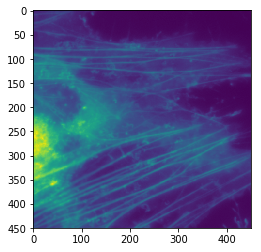

In [30]:
plt.imshow(mean_im)

In [ ]:
dd=deconvsk(gauss2D_mask((51, 51), 2), m_set[6], deconv_lambda, deconv_iter)
dd

In [ ]:
gauss2D_mask((1, 21), 2)

In [ ]:
def calculate_moment(im, moment_order, mean):
    moment = np.power(im - mean, moment_order)
    return moment

#def cumulant_from_moment(moment_lst, cumulant_lst, order):
    

In [ ]:
vid_reader = imageio.get_reader(filepath + '/' + filename)
mvlength = vid_reader.get_length()
t = vv.imshow(reader.get_next_data(), clim=(0, 255))

In [ ]:
def get_dimensions(filepath, filename):
    
    return xdim, ydim, mvlength


In [101]:
alpha = deconv_lambda**1 / (deconv_lambda - 1)
deconv_im = richardson_lucy(ext_im, deconv_psf0**alpha, 1,0)
deconv_im
#import tifffile as tiff
#tiff.imwrite('test.tif', deconv_im, dtype='int',)

array([[1.43679867e+14, 9.01441320e+13, 2.77819508e+14, ...,
        2.77819508e+14, 9.01441320e+13, 1.43679867e+14],
       [2.22314374e+14, 2.07922441e+14, 5.99550091e+13, ...,
        5.99550091e+13, 2.07922441e+14, 2.22314374e+14],
       [7.71749292e+13, 1.56679716e+14, 1.81069435e+14, ...,
        1.81069435e+14, 1.56679716e+14, 7.71749292e+13],
       ...,
       [7.71749292e+13, 1.56679716e+14, 1.81069435e+14, ...,
        1.81069435e+14, 1.56679716e+14, 7.71749292e+13],
       [2.22314374e+14, 2.07922441e+14, 5.99550091e+13, ...,
        5.99550091e+13, 2.07922441e+14, 2.22314374e+14],
       [1.43679867e+14, 9.01441320e+13, 2.77819508e+14, ...,
        2.77819508e+14, 9.01441320e+13, 1.43679867e+14]])

In [103]:
x=richardson_lucy(ext_im, deconv_psf0**alpha, 1,1)
deconv_im-x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])